In [101]:
import numpy as np
import pandas as pd
pd.set_option('max_columns', 105)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore")

In [103]:
df=pd.read_csv('bert2.csv')
df.head()
print(df.shape)

(645320, 4)


In [104]:
df.sort_values(by=['ctr'],ascending=True,inplace=True)
df2= df.query('show > 1000')
print(df2.shape)
df2.head()

(126312, 4)


,title,show,click,ctr
76209,躺着玩手机都能赚钱，刷刷视频， 满0.3元就能提现！,1047,1,0.095511
214385,有气体探测器可燃气体,1022,1,0.097847
24536,购买粉末丁晴橡胶认准广胜橡塑,1459,2,0.137080
139819,胭脂红厂家-欢迎选购,1355,2,0.147601
80639,再也不用求人借钱了，手机号最高可借200000元,1271,2,0.157356


In [105]:
df = df[df.title.apply(lambda x: len(str(x))>5)]
df.sort_values(by=['ctr'],ascending=False,inplace=True)
df.query('show > 1000').head(100)

,title,show,click,ctr
295642,那位日揽件四千的快递员，常人能做到吗？有人称还是身体重要,1292,960,74.303406
131937,你以为顺丰仅是一家快递公司？小米顺丰联手对你竟有这些好处,1268,922,72.712934
288026,因答应马云的“苛刻”要求，不仅还清了百万债务，还赢得马云入股,1367,984,71.982443
139856,自从学会豆腐这个做法，孩子三天两头嚷嚷要吃，每次一大盘都不够,1016,722,71.062992
150895,炒西红柿鸡蛋时注意了，鸡蛋和西红柿的顺序别弄反，不然不好吃,1343,949,70.662695
125208,淘宝卖家：订单越少，运费越没有话语权，至今2千块的货压在仓库,1883,1320,70.100903
337449,京东离职快递员：站长为做数据，竟让快递员自掏腰包，真受不了！,2123,1482,69.806877
3285,凉拌黄瓜直接拌，大错特错，大厨师傅：多加1步，清脆爽口又入味,1371,949,69.219548
497560,教你正确做虎皮青椒，很多人少了这1步，青椒难怪不入味不起皮,1318,910,69.044006
555124,4月女人不要放过这菜，每天吃一点，气色红润腰更细了体重悄悄降,1163,798,68.615649


In [106]:
df.describe()

,show,click,ctr
count,644783.000000,644783.000000,644783.000000
mean,1382.141213,216.746253,16.519820
std,7549.933599,1138.669215,12.892534
min,101.000000,1.000000,0.095511
25%,154.000000,15.000000,5.708849
50%,278.000000,41.000000,13.888889
75%,727.000000,116.000000,24.080268
max,826348.000000,106983.000000,85.875706


In [183]:
neg= df[df.ctr < 16]
neg.shape

(358521, 4)

In [184]:
pos= df[df.ctr >30]
pos.shape

(96150, 4)

In [185]:
mid =  df.query('ctr>16 and ctr<30')
mid.shape

(189548, 4)

In [186]:
neg.head(100)

,title,show,click,ctr
319237,突然关闭花呗的用户中，这2种类型的人偏多，他们察觉到了什么？,8220,1315,15.997567
396594,立秋后，吃茄子吃豆角，不如吃它，清热除湿又降压，还不花1分钱,6645,1063,15.996990
362008,《新白娘子传奇》梁连一心抓许仙，白福二次归命，白素贞起程杭州,3657,585,15.996719
171788,周慧敏老公多次出轨，到处拈花惹草，为何她死活不离婚？,2438,390,15.996719
159045,四张色盲图，图4看不到数字才正常，看到数字，说明你是色盲,2213,354,15.996385
304625,杭州23岁男子被六七个姑娘围堵在厕所门口 满脸通红！怎么回事？,1069,171,15.996258
599589,岳云鹏：我“浪一浪”怎么了！于谦都管不住,944,151,15.995763
379401,家里再有钱，塑料瓶盖一个也不要丢，放在家里很实用,919,147,15.995647
347642,飞船查出203处故障，却坚持升空，返航后宇航员只剩烧焦的腿骨！,794,127,15.994962
295705,都说生孩子疼，具体哪些情况疼你却未必知道，那滋味经历过才懂,1388,222,15.994236


In [188]:
pos.sort_values(by=['show'],ascending=False,inplace=True)
pos.head(100)

,title,show,click,ctr
176025,此无耻小人混上梁山，外号狂实力弱，与鲁智深一战才知他真有本事,209513,68180,32.542133
65323,8种去掉皮的水果，全部认出来才算顶级吃货，被最后2个难住了！,199847,61296,30.671464
619424,15层掉下玻璃窗当场砸死女童，妈妈抱尸体痛哭，住户：突然就掉了,193206,61844,32.009358
95867,她是乾隆的“孙女”，却被乾隆纳入后宫，死后葬入下等石池中,170167,55162,32.416391
96013,妈，你当年咋看上我爸的？！网友晒出爸妈结婚照，火了……,169056,65816,38.931478
337993,儿子有百万家产6套房，父亲却住地下室，母亲公然带男友住进豪宅,154994,64587,41.670645
39486,80后中国小伙在非洲当上酋长，走红背后的故事>>,152568,49918,32.718526
289769,崔永元道歉：很后悔，坚决拥护中央调查组结论>>,151460,49736,32.837713
573671,山东首富花650万美元送女上名校，步长制药遭起底>>,148761,49601,33.342744
6352,广西5死38伤火灾进展：4名涉案人员被抓，现场图曝光>>,147796,50006,33.834475


In [111]:
neg['label'] = 0
mid['label'] = 1
pos['label'] = 2

In [112]:
n= neg[['title','label']]
p= pos[['title','label']]
m= mid[['title','label']]
res= pd.concat([n,p,m]).reset_index(drop=True)
print(res.shape)
res.head()


(644219, 2)


,title,label
0,突然关闭花呗的用户中，这2种类型的人偏多，他们察觉到了什么？,0
1,立秋后，吃茄子吃豆角，不如吃它，清热除湿又降压，还不花1分钱,0
2,《新白娘子传奇》梁连一心抓许仙，白福二次归命，白素贞起程杭州,0
3,周慧敏老公多次出轨，到处拈花惹草，为何她死活不离婚？,0
4,四张色盲图，图4看不到数字才正常，看到数字，说明你是色盲,0


In [3]:
# save to CSV
df=pd.read_csv('bert.csv')[['title','label']]
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

df = shuffle(df)

tr,te= train_test_split(df, test_size=0.1)
print(tr.shape)
print(te.shape)
tr.reset_index(drop=True,inplace=True)
te.reset_index(drop=True,inplace=True)
tr.to_csv('train.csv')
te.to_csv('eval.csv')
# df[['title','label']].to_csv('bert_shuffle.csv')

(579797, 2)
(64422, 2)


In [195]:
# Load bert result
df_raw=pd.read_csv('predict_raw.csv')
df_res=pd.read_csv('test_results.csv')
print(df_raw.shape)
print(df_raw[(df_raw.label==0)].shape)
df_raw.head()

(62699, 3)
(34284, 3)


,index,title,label
0,0,为什么玄关要隔断,0
1,1,要点一览！国务院发布《深化医药卫生体制改革2019年重点工作任务》,0
2,2,韩国美女网红为方便前中国捞金，花600万将自己整成小杨颖！,2
3,3,2019年，Linux运维行业的趋势，跟不上学习就被淘汰,0
4,4,致命女人 预告片,0


In [196]:
df_res.head()

,A,B,C
0,0.996417,0.002997,0.000585
1,0.717965,0.233433,0.048602
2,0.469099,0.396239,0.134662
3,0.519223,0.366954,0.113822
4,0.743912,0.213951,0.042137


In [197]:
t=df_res.values.tolist()

df_raw['prob']=t
df_raw['pre_label']= np.argmax(t, axis=1)
df_raw['confident']= [x[0] for x in t]
# convert A as 1, B,C as 0 
df_raw.label[df_raw.label!=0]=1
df_raw.pre_label[df_raw.pre_label!=0]=1

# convert pos as 1, neg as 0
df_raw.label[df_raw.label!=0]=3
df_raw.label[df_raw.label==0]=1
df_raw.label[df_raw.label==3]=0

df_raw.pre_label[df_raw.pre_label!=0]=3
df_raw.pre_label[df_raw.pre_label==0]=1
df_raw.pre_label[df_raw.pre_label==3]=0

In [198]:
df_raw.head(10)

,index,title,label,prob,pre_label,confident
0,0,为什么玄关要隔断,1,"[0.9964174000000001, 0.0029972545, 0.0005853472]",1,0.996417
1,1,要点一览！国务院发布《深化医药卫生体制改革2019年重点工作任务》,1,"[0.71796495, 0.23343338, 0.04860159]",1,0.717965
2,2,韩国美女网红为方便前中国捞金，花600万将自己整成小杨颖！,0,"[0.46909913, 0.396239, 0.13466184]",1,0.469099
3,3,2019年，Linux运维行业的趋势，跟不上学习就被淘汰,1,"[0.5192235, 0.3669542, 0.11382221]",1,0.519223
4,4,致命女人 预告片,1,"[0.74391156, 0.21395132, 0.04213716]",1,0.743912
5,5,这类食物隔夜吃易致癌，有一个你一直在继续！,1,"[0.6826631999999999, 0.259182, 0.05815478]",1,0.682663
6,6,伊朗拿出杀伤性武器，美国将成全球罪人，特朗普立马呼吁和谈,0,"[0.28603408, 0.35931447, 0.35465148]",0,0.286034
7,7,如果你有儿子，这3句话请烂在肚子里别说出口，容易毁了孩子,1,"[0.2815792, 0.5293460999999999, 0.18907471]",0,0.281579
8,8,古董交易出手、只收10%成交佣金，免费图片在线鉴定！,1,"[0.9956155000000001, 0.0037255070000000003, 0....",1,0.995616
9,9,5本古言爆笑文：《唐砖》百看不厌，看女主华丽逆转玩转异时代,0,"[0.48903859999999993, 0.38497177, 0.12598968]",1,0.489039


In [176]:
df_tp= df_raw[(df_raw.label==1) & (df_raw.pre_label==1)]
df_tn= df_raw[(df_raw.label==0) & (df_raw.pre_label==0)]
df_fp= df_raw[(df_raw.label==0) & (df_raw.pre_label==1)]
df_fn= df_raw[(df_raw.label==1) & (df_raw.pre_label==0)]
tp = df_tp.shape[0]
tn = df_tn.shape[0]
fp = df_fp.shape[0]
fn = df_fn.shape[0]
n =df_raw.shape[0]

In [179]:
accuracy = (tp+tn)/n
precision = tp / (tp+fp)
recall = tp / (tp+fn)
F1 = (2*precision*recall) / (precision+recall)

tpr = tp / (tp+fn)
fpr = fp / (fp+tn)
print('accuracy =',accuracy)
print('precision =',precision)
print('recall =',recall)
print('F1 score =',F1)
print('tpr =',tpr)
print('fpr =',fpr)
from sklearn import metrics
y=df_raw.label.values
pred= df_raw.confident.values
fpr, tpr, thresholds = metrics.roc_curve(y_true=y, y_score=pred, pos_label=1)
roc_auc = metrics.auc(fpr, tpr)
print('auc=', roc_auc)

accuracy = 0.701717730745307
precision = 0.7116659421864812
recall = 0.7640590362851476
F1 score = 0.7369324255893771
tpr = 0.7640590362851476
fpr = 0.3734999120183002
auc= 0.7874442194894072


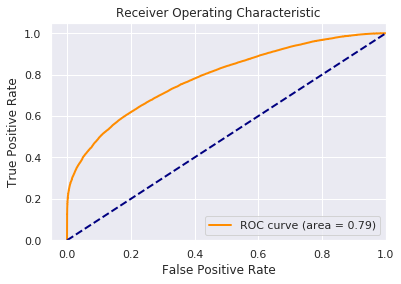

In [180]:
plt.figure()
linewidth = 2
plt.plot(fpr, tpr, color='darkorange',lw=linewidth, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()